In [445]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report as report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import average_precision_score
import seaborn as sns
from sklearn.metrics import confusion_matrix as matrix
from sklearn.metrics import average_precision_score
from sklearn.ensemble import IsolationForest
RANDOM_STATE = 42
np.random.seed(seed=RANDOM_STATE)
import matplotlib.pyplot as plt

# Dataset1: http(contamination:0.0039)

## load train/test data

In [446]:
http_train=pd.read_csv('data/http_train.csv',sep=',')
http_test=pd.read_csv('data/http_test.csv',sep=',')

#train_raw_data = http_train.drop(http_train.index[0])
train_data = http_train.drop(http_train.columns[-1],axis='columns')
train_label = http_train.iloc[:,-1]

#test_raw_data = http_test.drop(http_test.index[0])
test_data = http_test.drop(http_test.columns[-1],axis='columns')
test_label = http_test.iloc[:,-1]

#train_data.head()
http_train.shape

(453998, 4)

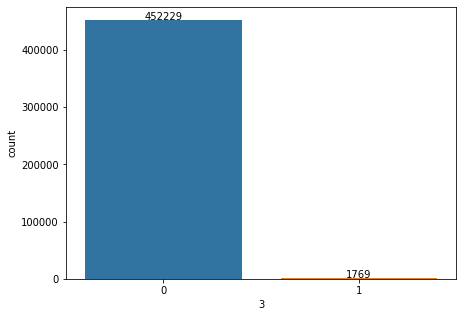

In [417]:
plt.figure(figsize=(7,5))
fig = sns.countplot(x="3", data=http_train)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")

## build a model(isolation forest)

In [447]:
IF_model = IsolationForest(n_estimators=60,random_state=42,contamination=(0.003911734),n_jobs=-1,behaviour="new")
# param_grid = {'n_estimators': list(range(50, 300, 50)), 
#               'max_samples': list(range(200, 500, 20)), 
#               'contamination': [0.0040, 0.0050,0.0060,0.0070,0.0080,0.0090,0.010],
#                }
# #"'max_features':list"
# IF_model = GridSearchCV(IF_model, param_grid ,scoring="average_precision", cv=5)
IF_model.fit(train_data,train_label)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.003911734,
                max_features=1.0, max_samples='auto', n_estimators=60,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

## calculate average precision

In [448]:
test_score=IF_model.decision_function(test_data)
print(test_score)
average_precision = average_precision_score(test_label, test_score)
print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))

[0.31367355 0.2821482  0.30755124 ... 0.29851435 0.34102049 0.28994197]
Average precision-recall score: 0.00363


## make predict

In [327]:
result_model=IF_model.predict(test_data)
#report_model=report(test_label,result_model,digits=5)
for i in range(len(result_model)):
    if(result_model[i]==-1):
        result_model[i]=1
    else:
        result_model[i]=0
#print(result_model)
report_model=report(test_label,result_model,digits=5)
matrix_model=matrix(test_label,result_model)
print(report_model)
print(matrix_model)

              precision    recall  f1-score   support

           0    0.99988   0.99990   0.99989    113058
           1    0.97494   0.96833   0.97162       442

    accuracy                        0.99978    113500
   macro avg    0.98741   0.98411   0.98576    113500
weighted avg    0.99978   0.99978   0.99978    113500

[[113047     11]
 [    14    428]]


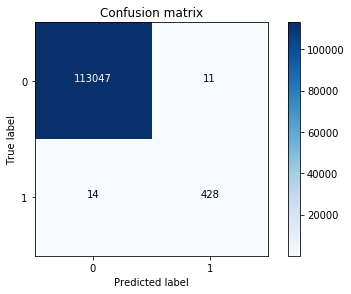

In [173]:
# Plot non-normalized confusion matrix

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
class_names = [0,1]
plt.figure()
plot_confusion_matrix(matrix_model
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

# Dataset2: Cardio (Contamination : 0.096)

## load train/test data

In [428]:
cardio_train=pd.read_csv('data/cardio_train.csv',sep=',')
cardio_test=pd.read_csv('data/cardio_test.csv',sep=',')

#train_raw_data = http_train.drop(http_train.index[0])
train_data = cardio_train.drop(cardio_train.columns[-1],axis='columns')
train_label = cardio_train.iloc[:,-1]

#test_raw_data = http_test.drop(http_test.index[0])
test_data = cardio_test.drop(cardio_test.columns[-1],axis='columns')
test_label = cardio_test.iloc[:,-1]

#train_data.head()
cardio_train.shape

(1464, 22)

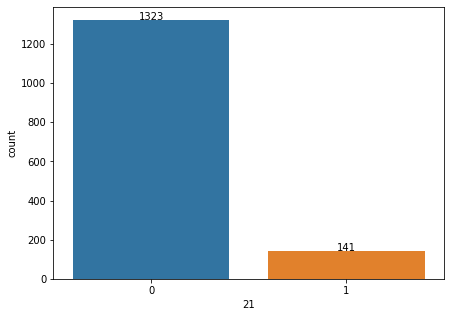

In [414]:
plt.figure(figsize=(7,5))
fig = sns.countplot(x="21", data=cardio_train)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")

In [329]:
141/(141+1323)

0.09631147540983606

## build a model

In [429]:
IF_model = IsolationForest(n_estimators=14,max_features=1.0,max_samples=75,random_state=40,contamination=0.099, behaviour='new')
# param_grid = {'n_estimators': list(range(100, 800, 5)), 
#               'max_samples': list(range(100, 500, 5)), 
#               'contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
#               'bootstrap': [True, False], 
#               'n_jobs': [5, 10, 20, 30]}
# IF_model = GridSearchCV(IF_model, param_grid ,scoring='average_precision', cv=5)
IF_model.fit(train_data,train_label)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.099,
                max_features=1.0, max_samples=75, n_estimators=14, n_jobs=None,
                random_state=40, verbose=0, warm_start=False)

## average precision score

In [433]:
test_score=IF_model.decision_function(test_data)
#print(test_score)
average_precision = average_precision_score(test_label, test_score)
print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))

Average precision-recall score: 0.05156


## make predict

In [331]:
result_model=IF_model.predict(test_data)
#report_model=report(test_label,result_model,digits=5)
for i in range(len(result_model)):
    if(result_model[i]==-1):
        result_model[i]=1
    else:
        result_model[i]=0
#print(result_model)
report_model=report(test_label,result_model,digits=5)
matrix_model=matrix(test_label,result_model)
print(report_model)
print(matrix_model)

              precision    recall  f1-score   support

           0    0.97015   0.97892   0.97451       332
           1    0.78125   0.71429   0.74627        35

    accuracy                        0.95368       367
   macro avg    0.87570   0.84660   0.86039       367
weighted avg    0.95213   0.95368   0.95275       367

[[325   7]
 [ 10  25]]


# Dataset3: creditcard (0.00173)

## load data

In [441]:
credit_train=pd.read_csv('data/credit_train.csv',sep=',')
credit_test=pd.read_csv('data/credit_test.csv',sep=',')

#train_raw_data = http_train.drop(http_train.index[0])
train_data = credit_train.drop(credit_train.columns[-1],axis='columns')
train_label = credit_train.iloc[:,-1]

#test_raw_data = http_test.drop(http_test.index[0])
test_data = credit_test.drop(credit_test.columns[-1],axis='columns')
test_label = credit_test.iloc[:,-1]

#train_data.head()
credit_train.shape

(227845, 31)

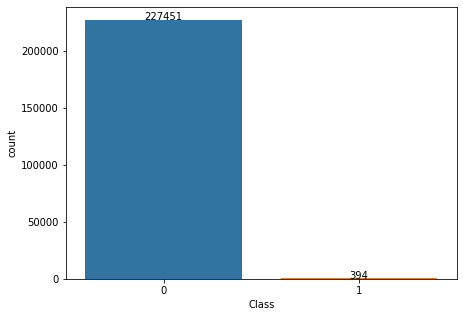

In [442]:
plt.figure(figsize=(7,5))
fig = sns.countplot(x="Class", data=credit_train)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x()+p.get_width()/2., height + 0.5,height ,ha="center")

In [333]:
394/(394+227451)

0.001729245759178389

## build a model

In [443]:
IF_model = IsolationForest(warm_start=True,n_estimators=100,max_features=0.63,random_state=42,n_jobs=-1,contamination=0.001729245759178389, behaviour='new')
# param_grid = {'n_estimators': list(range(100, 800, 5)), 
#               'max_samples': list(range(100, 500, 5)), 
#               'contamination': [0.1, 0.2, 0.3, 0.4, 0.5], 
#               'bootstrap': [True, False], 
#               'n_jobs': [5, 10, 20, 30]}
# IF_model = GridSearchCV(IF_model, param_grid ,scoring='average_precision', cv=5)
IF_model.fit(train_data,train_label)

IsolationForest(behaviour='new', bootstrap=False,
                contamination=0.001729245759178389, max_features=0.63,
                max_samples='auto', n_estimators=100, n_jobs=-1,
                random_state=42, verbose=0, warm_start=True)

## average precision score

In [444]:
test_score=IF_model.decision_function(test_data)
print(test_score)
average_precision = average_precision_score(test_label, test_score)
print('Average precision-recall score: {0:0.5f}'.format(
      average_precision))

[0.2669452  0.18280734 0.14169691 ... 0.2576255  0.26556225 0.25745438]
Average precision-recall score: 0.00088


## make predict

In [410]:
result_model=IF_model.predict(test_data)
#report_model=report(test_label,result_model,digits=5)
for i in range(len(result_model)):
    if(result_model[i]==-1):
        result_model[i]=1
    else:
        result_model[i]=0
#print(result_model)
report_model=report(test_label,result_model,digits=5)
matrix_model=matrix(test_label,result_model)
print(report_model)
print(matrix_model)

              precision    recall  f1-score   support

           0    0.99886   0.99875   0.99880     56864
           1    0.31731   0.33673   0.32673        98

    accuracy                        0.99761     56962
   macro avg    0.65808   0.66774   0.66277     56962
weighted avg    0.99768   0.99761   0.99765     56962

[[56793    71]
 [   65    33]]
